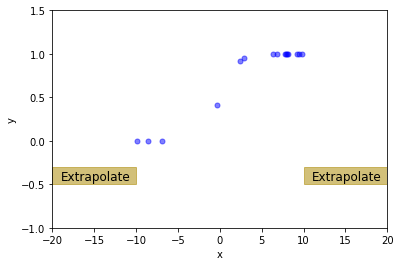

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab
import matplotlib.patches as patches

np.random.seed(410)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = (np.random.rand(15) * 20) - 10
y = sigmoid(x) 

pylab.ylim([-1,1.5])
pylab.xlim([-20,20])

plt.scatter(x, y, s=100, c="b", alpha=0.5, marker='.')
plt.xlabel("x")
plt.ylabel("y")

# Create a Rectangle patch
c = '#aa880086'
r1 = patches.Rectangle((-20,-0.5),10,0.2,linewidth=1,edgecolor=c,facecolor=c)
r2 = patches.Rectangle((-10,-0.5),20,0.2,linewidth=1,edgecolor=c,facecolor=c)
r3 = patches.Rectangle((10,-0.5),10,0.2,linewidth=1,edgecolor=c,facecolor=c)

plt.gca().add_patch(r1)
#plt.gca().add_patch(r2)
plt.gca().add_patch(r3)

plt.text(-19, -0.45, "Extrapolate", fontsize=12)
#plt.text(-4, -0.45, "Interpolate", fontsize=12)
plt.text(11, -0.45, "Extrapolate", fontsize=12)


plt.savefig('lin-ext.png', dpi=300)
plt.show()


# Neural Network Extrapolation

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab
import matplotlib.patches as patches

np.random.seed(410)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = (np.random.rand(15) * 20) - 10
y = sigmoid(x) 

In [3]:
y

array([9.99568595e-01, 9.46676695e-01, 9.99900538e-01, 9.98207283e-01,
       9.99705625e-01, 9.99612019e-01, 1.00119909e-03, 9.99944611e-01,
       4.07525997e-01, 9.99652784e-01, 1.79327384e-04, 9.99917287e-01,
       9.20809067e-01, 5.12834675e-05, 9.98945026e-01])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import metrics

model = Sequential()
model.add(Dense(20, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=0,epochs=1000)

# Predict and measure RMSE
pred = model.predict(x)
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Score (RMSE): {}".format(score))

Score (RMSE): 0.008512142745402556


In [5]:
x2 = np.arange(-50.0, 50.0, 2.0)
y_hat2 = model.predict(x2)
y2 = sigmoid(x2)

In [6]:
import pandas as pd
df = pd.DataFrame()
df['x'] = x2
df['y'] = y2
df['yHat'] = y_hat2

In [7]:
df

,x,y,yHat
0,-50.0,1.928750e-22,-0.668100
1,-48.0,1.425164e-21,-0.634795
2,-46.0,1.053062e-20,-0.601489
3,-44.0,7.781132e-20,-0.568183
4,-42.0,5.749522e-19,-0.534878
5,-40.0,4.248354e-18,-0.501572
6,-38.0,3.139133e-17,-0.468267
7,-36.0,2.319523e-16,-0.434961
8,-34.0,1.713908e-15,-0.401655
9,-32.0,1.266417e-14,-0.368350


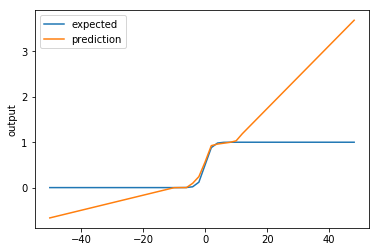

In [8]:
plt.plot(x2, df['y'].tolist(), label='expected')
plt.plot(x2, df['yHat'].tolist(), label='prediction')
plt.ylabel('output')
plt.legend()
plt.savefig('nn-ext.png', dpi=300)
plt.show()

# Bimodal Distribution

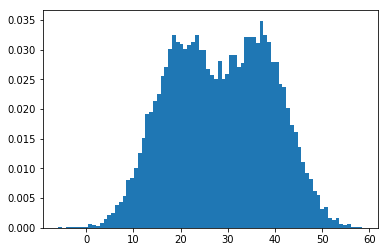

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

s1 = np.random.normal(20, 6.4, 10000)
s2 = np.random.normal(37, 6.3, 10000)

s = np.concatenate((s1, s2), axis=0)

count, bins, ignored = plt.hist(s, 80, density=True)

plt.savefig('bimodal.png', dpi=300)

plt.show()

# Mahalanobis Distance

In [10]:
from scipy.spatial import distance
iv = [
    [1  , 0.5, 0.5], 
    [0.5,   1, 0.5], 
    [0.5, 0.5,   1]]

In [11]:
distance.mahalanobis([1, 0, 0], [0, 1, 0], iv)

1.0

In [12]:
distance.mahalanobis([0, 2, 0], [0, 1, 0], iv)

1.0

In [13]:
distance.mahalanobis([2, 0, 0], [0, 1, 0], iv)

1.7320508075688772

# Diabetes

In [14]:
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.csv', na_values=['NA', '?'])
df.rename(columns={'diabetes': 'ds'},inplace=True)
df[0:7]

,pregnant,plasma,diastolic,triceps,insulin,bmi,ds,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [15]:
# Remove missing values
df = df[df.plasma != 0]
df = df[df.diastolic != 0]
df = df[df.triceps != 0]
df = df[df.insulin != 0]
df = df[df.bmi != 0]

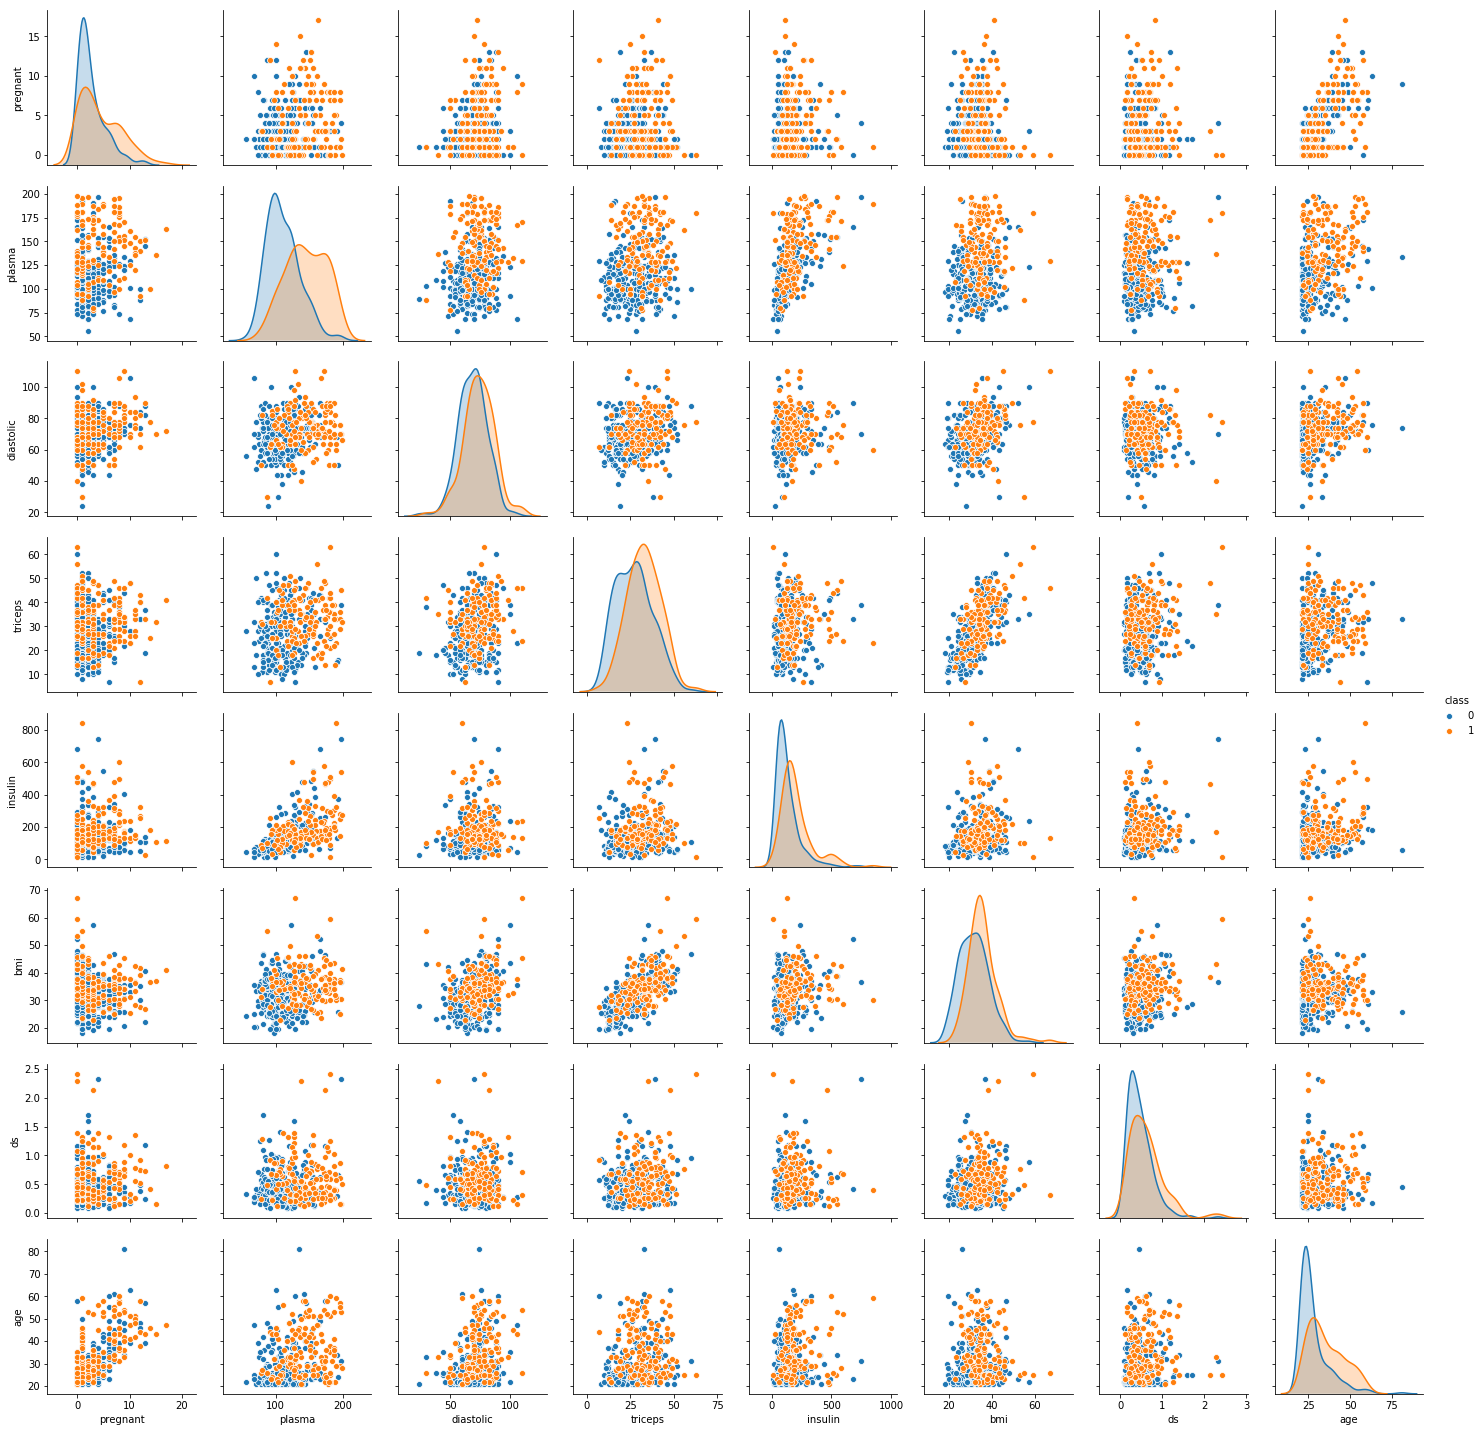

In [16]:
%matplotlib inline

# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
cols = list(df.columns)
cols.remove('class')
sns.pairplot(df, hue="class", vars=cols)


In [17]:
import base64
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to a single dummy variable.  The new columns (which do not replace the old) will have a 1
# at every location where the original column (name) matches each of the target_values.  One column is added for
# each target value.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = f"{name}-{tv}"
        df[name2] = l


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"


# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low


# This function submits an assignment.  You can submit an assignment as much as you like, only the final
# submission counts.  The paramaters are as follows:
# data - Pandas dataframe output.
# key - Your student key that was emailed to you.
# no - The assignment class number, should be 1 through 1.
# source_file - The full path to your Python or IPYNB file.  This must have "_class1" as part of its name.  
# .             The number must match your assignment number.  For example "_class2" for class assignment #2.
def submit(data,key,no,source_file=None):
    if source_file is None and '__file__' not in globals(): raise Exception('Must specify a filename when a Jupyter notebook.')
    if source_file is None: source_file = __file__
    suffix = '_class{}'.format(no)
    if suffix not in source_file: raise Exception('{} must be part of the filename.'.format(suffix))
    with open(source_file, "rb") as image_file:
        encoded_python = base64.b64encode(image_file.read()).decode('ascii')
    ext = os.path.splitext(source_file)[-1].lower()
    if ext not in ['.ipynb','.py']: raise Exception("Source file is {} must be .py or .ipynb".format(ext))
    r = requests.post("https://api.heatonresearch.com/assignment-submit",
        headers={'x-api-key':key}, json={'csv':base64.b64encode(data.to_csv(index=False).encode('ascii')).decode("ascii"),
        'assignment': no, 'ext':ext, 'py':encoded_python})
    if r.status_code == 200:
        print("Success: {}".format(r.text))
    else: print("Failure: {}".format(r.text))

In [18]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


x,y = to_xy(df,"class")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, 
                        restore_best_weights=True, verbose=1, mode='auto')

model.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 294 samples, validate on 98 samples
Epoch 1/1000
294/294 - 0s - loss: 4.3767 - val_loss: 3.9920
Epoch 2/1000
294/294 - 0s - loss: 3.1048 - val_loss: 2.7118
Epoch 3/1000
294/294 - 0s - loss: 1.8342 - val_loss: 1.9848
Epoch 4/1000
294/294 - 0s - loss: 1.3805 - val_loss: 1.3531
Epoch 5/1000
294/294 - 0s - loss: 1.1068 - val_loss: 1.0715
Epoch 6/1000
294/294 - 0s - loss: 0.9736 - val_loss: 0.9749
Epoch 7/1000
294/294 - 0s - loss: 0.8947 - val_loss: 0.8792
Epoch 8/1000
294/294 - 0s - loss: 0.7665 - val_loss: 0.7643
Epoch 9/1000
294/294 - 0s - loss: 0.7058 - val_loss: 0.8095
Epoch 10/1000
294/294 - 0s - loss: 0.6574 - val_loss: 0.7898
Epoch 11/1000
294/294 - 0s - loss: 0.6232 - val_loss: 0.8378
Epoch 12/1000
294/294 - 0s - loss: 0.6259 - val_loss: 0.8357
Epoch 13/1000
294/294 - 0s - loss: 0.6048 - val_loss: 0.7170
Epoch 14/1000
294/294 - 0s - loss: 0.5841 - val_loss: 0.7037
Epoch 15/1000
294/294 - 0s - loss: 0.5496 - val_loss: 0.8648
Epoch 16/1000
294/294 - 0s - loss: 0.5998 - val_l

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y_score = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

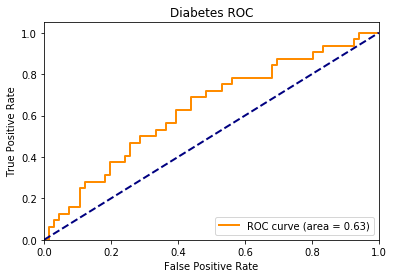

In [20]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Diabetes ROC')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn import metrics
import scipy as sp
import numpy as np
import math
from sklearn import metrics

def perturbation_rank(model, x, y, names, regression):
    errors = []

    for i in range(x.shape[1]):
        hold = np.array(x[:, i])
        np.random.shuffle(x[:, i])
        
        if regression:
            pred = model.predict(x)
            error = metrics.mean_squared_error(y, pred)
        else:
            pred = model.predict_proba(x)
            error = metrics.log_loss(y, pred)
            
        errors.append(error)
        x[:, i] = hold
        
    max_error = np.max(errors)
    importance = [e/max_error for e in errors]

    data = {'name':names,'error':errors,'importance':importance}
    result = pd.DataFrame(data, columns = ['name','error','importance'])
    result.sort_values(by=['importance'], ascending=[0], inplace=True)
    result.reset_index(inplace=True, drop=True)
    return result

In [22]:
# Rank the features
from IPython.display import display, HTML

names = list(df.columns) # x+y column names
names.remove("class") # remove the target(y)
rank = perturbation_rank(model, x_test, y_test, names, False)
display(rank)

,name,error,importance
0,insulin,0.779253,1.000000
1,triceps,0.766425,0.983538
2,plasma,0.747680,0.959482
3,age,0.709969,0.911090
4,ds,0.701399,0.900092
5,pregnant,0.693750,0.890276
6,bmi,0.658448,0.844973
7,diastolic,0.636824,0.817224


In [23]:
cols = list(df.columns)
cols.remove('class')

In [24]:
import itertools

s = [[df[col].max(), df[col].min()] for col in cols]
outer = list(itertools.product(*s))
outer = pd.DataFrame(outer, columns = cols)
outerMatrix = outer.values

In [32]:
list(zip(s,df.columns))

[([17, 0], 'pregnant'),
 ([198, 56], 'plasma'),
 ([110, 24], 'diastolic'),
 ([63, 7], 'triceps'),
 ([846, 14], 'insulin'),
 ([67.1, 18.2], 'bmi'),
 ([2.42, 0.085], 'ds'),
 ([81, 21], 'age')]

In [25]:
s

[[17, 0],
 [198, 56],
 [110, 24],
 [63, 7],
 [846, 14],
 [67.1, 18.2],
 [2.42, 0.085],
 [81, 21]]

In [39]:
shuffle = outer.reindex(np.random.permutation(outer.index))
shuffle.reset_index(inplace=True)
#shuffle.drop('index',inplace=True,axis=0)
shuffle[0:10]

,index,pregnant,plasma,diastolic,triceps,insulin,bmi,ds,age,dist
0,72,17,56,110,63,14,67.1,2.420,81,13.467012
1,203,0,56,110,63,14,67.1,0.085,21,11.295430
2,119,17,56,24,7,846,18.2,0.085,21,17.298342
3,159,0,198,110,7,14,18.2,0.085,21,11.423395
4,4,17,198,110,63,846,18.2,2.420,81,15.396377
5,8,17,198,110,63,14,67.1,2.420,81,13.614717
6,224,0,56,24,63,846,67.1,2.420,81,17.365191
7,68,17,56,110,63,846,18.2,2.420,81,17.213724
8,31,17,198,110,7,14,18.2,0.085,21,14.532720
9,5,17,198,110,63,846,18.2,2.420,21,17.707218


In [28]:
cv = df[cols].cov()
invCV = sp.linalg.inv(cv)
invCV

array([[ 1.84298829e-01, -1.29460987e-04, -1.45232254e-03,
        -2.99879302e-03,  2.89520282e-04,  8.44553211e-03,
         6.09811913e-02, -3.95587226e-02],
       [-1.29460987e-04,  1.75356265e-03, -3.74226696e-04,
        -1.30345074e-04, -2.33594084e-04, -2.28631937e-04,
        -7.32734422e-03, -1.01239643e-03],
       [-1.45232254e-03, -3.74226696e-04,  7.88854904e-03,
         4.44876317e-05,  6.52698668e-05, -4.20658138e-03,
         2.52928824e-02, -2.24294144e-03],
       [-2.99879302e-03, -1.30345074e-04,  4.44876317e-05,
         1.67527414e-02,  7.64136648e-06, -1.63005761e-02,
        -2.44213742e-02, -1.30164293e-03],
       [ 2.89520282e-04, -2.33594084e-04,  6.52698668e-05,
         7.64136648e-06,  1.10182337e-04, -2.25767151e-04,
        -1.24409791e-03, -1.08620760e-04],
       [ 8.44553211e-03, -2.28631937e-04, -4.20658138e-03,
        -1.63005761e-02, -2.25767151e-04,  4.00825298e-02,
        -4.33476646e-02,  1.56404404e-03],
       [ 6.09811913e-02, -7.327344

In [29]:
dfMatrix = df[cols].values

def maxDistance(a,dfMatrix,invCV):
    result = None
    
    for itm in dfMatrix:
        d = distance.mahalanobis(a,itm,invCV)
        if not result:
            result = d
        else:
            result = max(d,result)
            
    return result
        
outer['dist'] = [maxDistance(itm,dfMatrix,invCV) for itm in outerMatrix]


In [30]:
outer.sort_values(by=['dist'],ascending=False,inplace=True)

In [31]:
outer

,pregnant,plasma,diastolic,triceps,insulin,bmi,ds,age,dist
113,17,56,24,7,846,67.1,2.420,21,20.073668
81,17,56,110,7,846,67.1,2.420,21,19.734222
242,0,56,24,7,846,67.1,0.085,81,19.521839
240,0,56,24,7,846,67.1,2.420,81,19.375060
114,17,56,24,7,846,67.1,0.085,81,19.326832
115,17,56,24,7,846,67.1,0.085,21,19.156249
198,0,56,110,63,846,18.2,0.085,81,18.868134
230,0,56,24,63,846,18.2,0.085,81,18.856361
69,17,56,110,63,846,18.2,2.420,21,18.807562
112,17,56,24,7,846,67.1,2.420,81,18.772381
